In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

salaries = pd.read_csv('salaries _2.csv')
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


In [111]:
year_salaries_mean = salaries[['work_year', 'salary_in_usd']].groupby('work_year').mean('salary_in_usd').reset_index()
year_salaries_mean

,work_year,salary_in_usd
0,2020,102250.866667
1,2021,99922.073394
2,2022,134349.500906
3,2023,153732.664632
4,2024,150643.254853


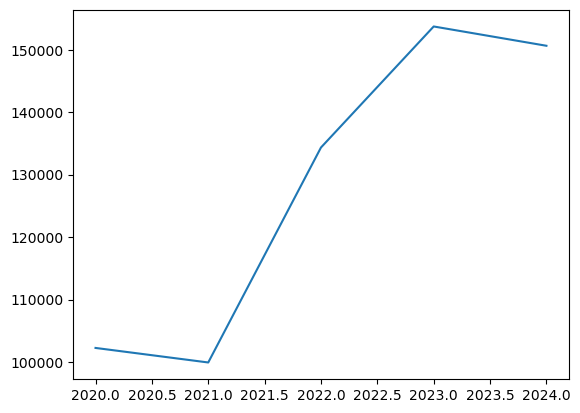

In [81]:
plt.plot(year_salaries_mean['work_year'], year_salaries_mean['salary_in_usd'])
plt.show()

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

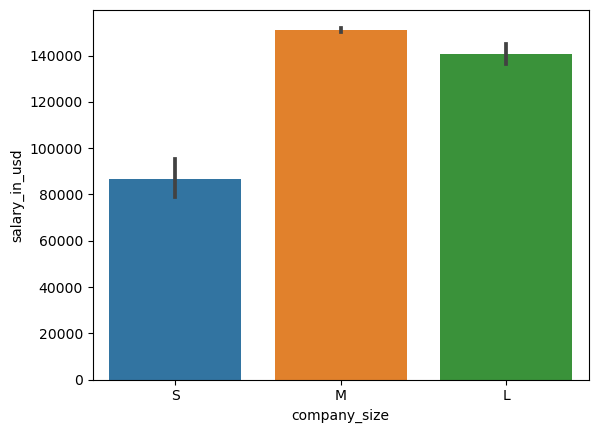

In [36]:
company_size_salaries = salaries[['company_size', 'salary_in_usd']]
sns.barplot(x='company_size', 
            y='salary_in_usd', 
            order=['S', 'M', 'L'],
            data=companysize_salaries)

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

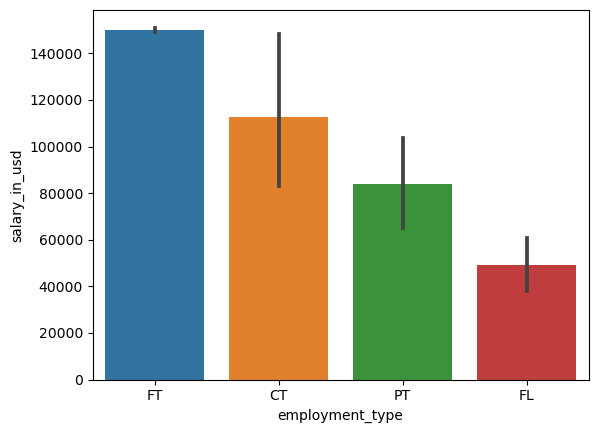

In [98]:
employment_type_salaries = salaries[['employment_type', 'salary_in_usd']]
sns.barplot(x='employment_type', 
            y='salary_in_usd', 
            data=employment_type_salaries)

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

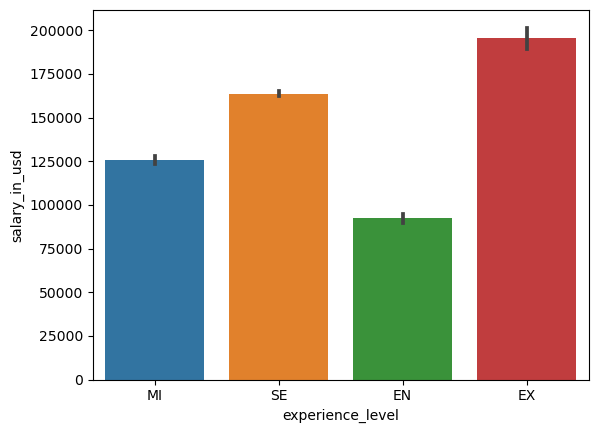

In [55]:
experience_level_salaries = salaries[['experience_level', 'salary_in_usd']]
sns.barplot(x='experience_level', 
            y='salary_in_usd', 
            data=experience_level_salaries)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='work_year', ylabel='median_salary'>

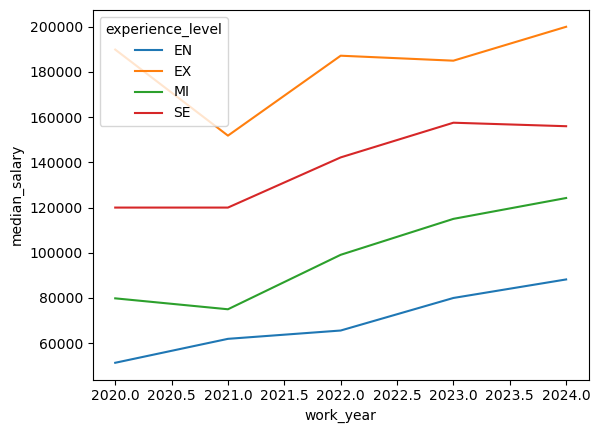

In [120]:
experience_level_salaries = salaries.groupby(['work_year', 'experience_level']).agg(median_salary=('salary_in_usd', 'median'))
sns.lineplot(x='work_year',
             y='median_salary',
             hue='experience_level',
             data=experience_level_salaries)

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

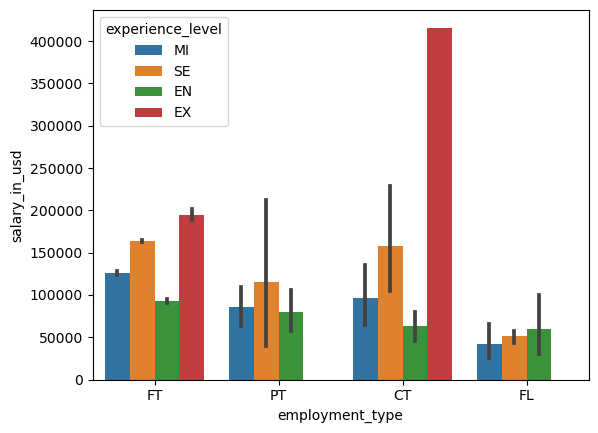

In [57]:
type_and_level_salaries = salaries[['experience_level', 'employment_type', 'salary_in_usd']]
sns.barplot(x='employment_type', 
            y='salary_in_usd', 
            hue='experience_level', 
            order = ['FT', 'PT', 'CT', 'FL'],
            data=type_and_level_salaries)

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

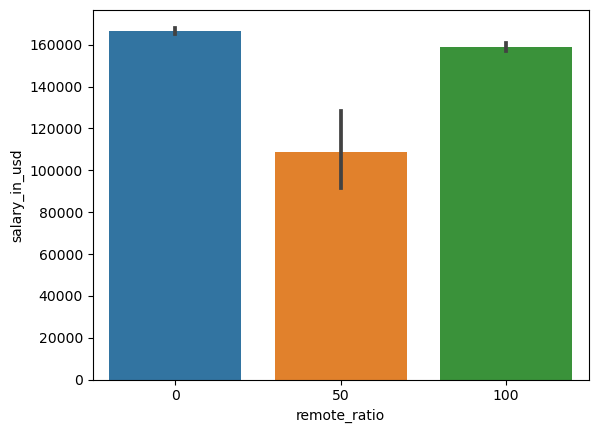

In [51]:
remote_ratio_salaries = salaries[salaries['experience_level'] == 'SE'][['remote_ratio', 'salary_in_usd']]
sns.barplot(x='remote_ratio',
            y='salary_in_usd',
            data=remote_ratio_salaries)

In [60]:
job_salaries_median = salaries[['job_title', 'salary_in_usd']].groupby('job_title').median('salary_in_usd').reset_index()
job_salaries_median.sort_values(by='salary_in_usd', ascending=False)

,job_title,salary_in_usd
12,Analytics Engineering Manager,399880.0
89,Data Science Tech Lead,375000.0
110,Head of Machine Learning,330000.0
131,Managing Director Data Science,280000.0
9,AWS Data Architect,258000.0
...,...,...
111,Insight Analyst,50838.0
41,Compliance Data Analyst,45000.0
152,Staff Data Analyst,44753.0
37,CRM Data Analyst,40000.0


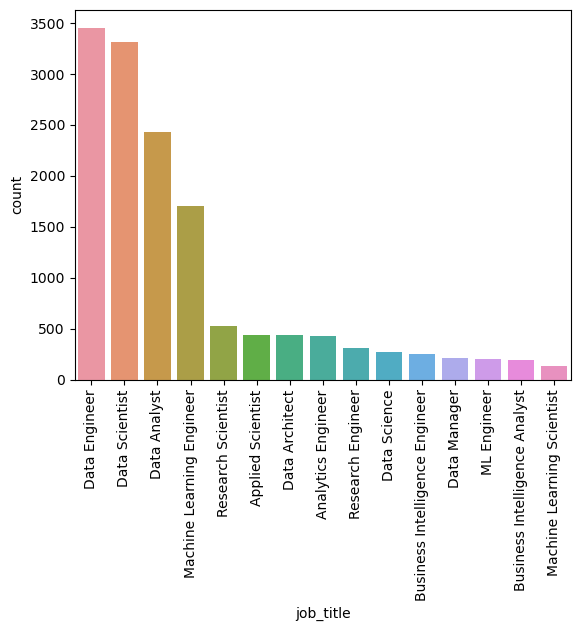

In [102]:
jobs = salaries.groupby('job_title').size().reset_index(name='count')
jobs = jobs.sort_values(by='count', ascending=False).head(15)
sns.barplot(x='job_title',
           y='count',
           data=jobs)
plt.xticks(rotation=90)
plt.show()


In [117]:
jobs_top = jobs['job_title'].tolist()
jobs_salaries_mean = salaries[salaries['job_title'].isin(jobs_top)][['job_title', 'salary_in_usd']].groupby('job_title').mean('salary_in_usd').reset_index()
jobs_salaries_mean.sort_values(by='salary_in_usd', ascending=False)

,job_title,salary_in_usd
10,ML Engineer,193520.969697
14,Research Scientist,192011.022684
13,Research Engineer,190177.977124
12,Machine Learning Scientist,190077.847826
1,Applied Scientist,190034.390300
11,Machine Learning Engineer,188639.367587
8,Data Science,162381.531365
5,Data Architect,161082.080831
0,Analytics Engineer,160215.255220
9,Data Scientist,154143.688104


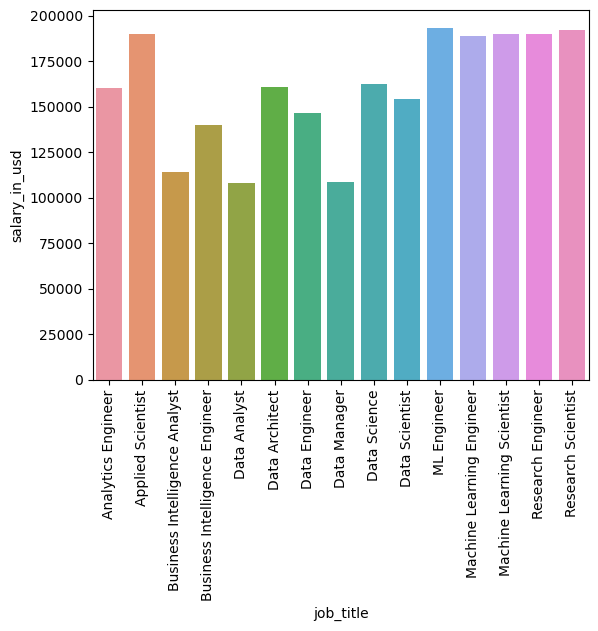

In [119]:
sns.barplot(x='job_title',
           y='salary_in_usd',
           data=jobs_salaries_mean)
plt.xticks(rotation=90)
plt.show()